### <font color='red'> Project 2 Regression

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.


# Importing the 2 files:


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Audit_Risk.csv')
data2= pd.read_csv('trial.csv')


## Checking shape of imported data frames:


In [2]:
print(data.shape)
print(data2.shape)

(776, 27)
(776, 18)



## I shall supress warnings so that the code is more readable


In [3]:
import warnings
warnings.filterwarnings("ignore")


# Now I will check each column for a value that indicates bad/missing value (only looking at columns with less number of unique values)


In [4]:
for col in data:
    if data[col].nunique()<25:
        print(col,data[col].unique())
        
for col in data2:
    if data2[col].nunique()<25:
        print(col,data2[col].unique())

Sector_score [ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]
Score_A [0.6 0.2 0.4]
Score_B [0.2 0.6 0.4]
numbers [5.  6.  5.5 6.5 9. ]
Score_B.1 [0.2 0.6 0.4]
Risk_C [1.  3.6 2.2 3.9 5.4]
Score_MV [0.2 0.6 0.4]
District_Loss [2 4 6]
PROB [0.2 0.4 0.6]
RiSk_E [0.4 0.8 1.2 2.4 1.6]
History [0 1 2 3 9 5 4]
Prob [0.2 0.4 0.6]
Risk_F [0.  0.4 1.2 1.8 5.4 3.  2.4]
Score [2.4 2.  4.4 3.2 4.2 3.6 4.  2.2 3.  2.6 3.8 3.4 4.8 2.8 5.2 4.6 5. ]
CONTROL_RISK [0.4 1.2 0.8 1.6 2.2 5.8 2.  2.4 3.4 4.8 3.6]
Detection_Risk [0.5]
Risk [1 0]
Sector_score [ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]
SCORE_A [6 2 4]
SCORE_B [2 6 4]
numbers [5.  6.  5.5 6.5 9. ]
Marks [2 6 4]
MONEY_Marks [2 6 4]
District [2 4 6]
Loss [0 1 2]
LOSS_SCORE [2 4 6]
History [0 1 2 3 9 5 4]
History_score [2 4 6]
Score [2.4 2.  4.4 3.2 4.2 3.6 4.  2.2 3.  2.6 3.8 3.4 4.8 2.8 5.2 4.6 5. ]
Risk [1 0]



# There seem to be no bad value indicators.I will now check for the number of null values in each dataframe:


In [5]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
data2.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


## There is only one missing value in each dataframe.(Both are in the Money_Value column of their respective dataframes). Therefore, I shall explore the Money_Value and decide if replacing by mean or median is better(I chose to replace because there is only 1 missing value)


In [7]:
data['Money_Value'].describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64

In [8]:
data2['Money_Value'].describe()

count    775.000000
mean      14.137631
std       66.606519
min        0.000000
25%        0.000000
50%        0.090000
75%        5.595000
max      935.030000
Name: Money_Value, dtype: float64


## Since there is only 1 missing value and there seem to be large outliers, I have decided to replace with median.


In [9]:
data['Money_Value'].median()
data['Money_Value'].fillna((data['Money_Value'].median()), inplace=True)
data2['Money_Value'].median()
data2['Money_Value'].fillna((data2['Money_Value'].median()), inplace=True)


## I will check if replacing NaN was sucessful


In [10]:
print(data2.isnull().any().any())
print(data.isnull().any().any())

False
False



# I will now check if there are any duplicate rows:


In [11]:
dupli_num=data.duplicated().sum()
dupli_num2=data2.duplicated().sum()
data.drop_duplicates(keep='first', inplace=True)
data2.drop_duplicates(keep='first', inplace=True)
print(dupli_num,dupli_num2)

13 13



## I have removed the duplicates(there are only a few so it's okay to do so and duplicates inflate test and training scores) so that there are can exist a primary key that can uniquely identify the dataframe observations.
## Since there are no longer any null values, I will proceed with finding out what the columns in common between the two dataframes are:


In [12]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
print(intersection(list(data2.columns),list(data.columns)))
common_cols=intersection(list(data2.columns),list(data.columns))

['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']



# ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk'] are the columns in common in between the dataframes.(This is to find a key to merge with).
## I will now look at the data in these columns using head:


In [13]:
print(data[common_cols].head(10))
print(data2[common_cols].head(10))

   Sector_score LOCATION_ID  PARA_A  PARA_B  TOTAL  numbers  Money_Value  \
0          3.89          23    4.18    2.50   6.68      5.0         3.38   
1          3.89           6    0.00    4.83   4.83      5.0         0.94   
2          3.89           6    0.51    0.23   0.74      5.0         0.00   
3          3.89           6    0.00   10.80  10.80      6.0        11.75   
4          3.89           6    0.00    0.08   0.08      5.0         0.00   
5          3.89           6    0.00    0.83   0.83      5.0         2.95   
6          3.89           7    1.10    7.41   8.51      5.0        44.95   
7          3.89           8    8.50   12.03  20.53      5.5         7.79   
8          3.89           8    8.40   11.05  19.45      5.5         7.34   
9          3.89           8    3.98    0.99   4.97      5.0         1.93   

   History  Score  Risk  
0        0    2.4     1  
1        0    2.0     0  
2        0    2.0     0  
3        0    4.4     1  
4        0    2.0     0  
5      


# I will search for a possible key by checking the number of unique values each column has in the dataframes:


In [14]:
print(data[common_cols].nunique())
print(data2[common_cols].nunique())
print(len(data),len(data2))

Sector_score     13
LOCATION_ID      45
PARA_A          363
PARA_B          358
TOTAL           471
numbers           5
Money_Value     328
History           7
Score            17
Risk              2
dtype: int64
Sector_score     13
LOCATION_ID      45
PARA_A          363
PARA_B          358
TOTAL           471
numbers           5
Money_Value     328
History           7
Score            17
Risk              2
dtype: int64
763 763



## Since no column can suffice as a stand alone key,I will search for best possible key to merge the tables on by creating a dictionary of all combinations of the common columns to see which can provide best merge:


In [15]:
import copy
def st1(y):
    z=''
    for i in y:
        z=z+data[i].astype(str)+"***"
    return z
def st2(y):
    z=''
    for i in y:
        z=z+data2[i].astype(str)+"***"
    return z
def rec_definer(i,u,t):
    tt=copy.copy(t)
    for x in common_cols:
        if not (x in t):
            y=l
            y.append(x)
            tt.append(x)
            if(i>2):
                rec_definer(i-1,y,tt)
            z=st1(y)
            zz=st2(y)
            if not (z.nunique()==(len(data))):
                a=0
            elif not (zz.nunique()==(len(data2))):
                a=0
            else:
                z=z.sort_values()
                zz=zz.sort_values()
                a=(z==zz).sum()
                merge_dict[tuple(y)]=a
            y.pop();

In [16]:
merge_dict={}
common_cols=['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score', 'Risk']
for i in range(2,len(common_cols)+1):
    t=[ ]
    for x in range(len(common_cols)):
        l=[common_cols[x]]
        t.append(common_cols[x])
        rec_definer(i,l,t)
    del t[:]


## Now I will look at the dictionary for the largest possible key that has value closest to length of dataframes, so that there will be minimum NaN values created in the merged data and I will have the least number of identical columns to deal with later


In [17]:
import collections
for k in merge_dict:
    if(merge_dict[k]==len(data)):
        print(k,merge_dict[k])



('Sector_score', 'LOCATION_ID', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_B', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'TOTAL', 'numbers', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'TOTAL', 'Money_Value', 'History', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'numbers', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'Money_Value', 'History', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'TOTAL', 'numbers', 'Money_Value', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_A', 'TOTAL', 'Money_Value', 'History', 'Score') 763
('Sector_score', 'LOCATION_ID', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'Scor


# Now performing merge to create the new dataframe.


In [18]:
df= pd.merge(data,data2, 
             left_on = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score'],
            right_on = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'History', 'Score'],how='inner')


## After merging we check the shape of the dataframe created.


In [19]:
print(df.shape)
print(data.shape)
print(data2.shape)

(763, 36)
(763, 27)
(763, 18)



## I shall have a cursory look at the data


In [20]:
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 36 columns):
Sector_score      763 non-null float64
LOCATION_ID       763 non-null object
PARA_A            763 non-null float64
Score_A           763 non-null float64
Risk_A            763 non-null float64
PARA_B            763 non-null float64
Score_B           763 non-null float64
Risk_B            763 non-null float64
TOTAL             763 non-null float64
numbers           763 non-null float64
Score_B.1         763 non-null float64
Risk_C            763 non-null float64
Money_Value       763 non-null float64
Score_MV          763 non-null float64
Risk_D            763 non-null float64
District_Loss     763 non-null int64
PROB              763 non-null float64
RiSk_E            763 non-null float64
History           763 non-null int64
Prob              763 non-null float64
Risk_F            763 non-null float64
Score             763 non-null float64
Inherent_Risk     763 non-null float64
CON


# Checking the Location Id,eliminating bad rows and converting type


In [21]:
print(df.LOCATION_ID.unique())
l=['LOHARU', 'NUH', 'SAFIDON']
df=df[~df.LOCATION_ID.isin(l)];


['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']



# I shall drop Detction_Risk(Which I will drop because it  has only one value) and Location Id column that has 42 unique values and is nominal.I shall also drop Risk_y as it is not a target and would cause data leakage.


In [22]:
print(np.dtype(df['LOCATION_ID']))
df.drop('LOCATION_ID', inplace=True, axis = 1)
print(df['Detection_Risk'].unique())
df.drop('Detection_Risk',axis=1,inplace=True)
df.drop('Risk_y',axis=1,inplace=True)
df.shape

object
[0.5]


(760, 33)


# I shall now attempt to deal with outliers(threshold is 5z).


In [23]:
from scipy import stats
import numpy as np


z = np.abs(stats.zscore(df))
threshold = 5
df = df[(z < threshold).all(axis=1)]
df.shape

(713, 33)


# I will move on to checking for correlation


In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (15,15))
sn.set(font_scale=2.0)
sn.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

<Figure size 1500x1500 with 2 Axes>


# Remove correlated colums from dataframe (I am choosing 99% as arbitary threshold). This will eliminate simmilar columns with different scale


In [25]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    dataset.drop(colname,inplace = True, axis = 1) # deleting the column from the dataset

correlation(df,0.99)


## Now lets check the correlation matrix again


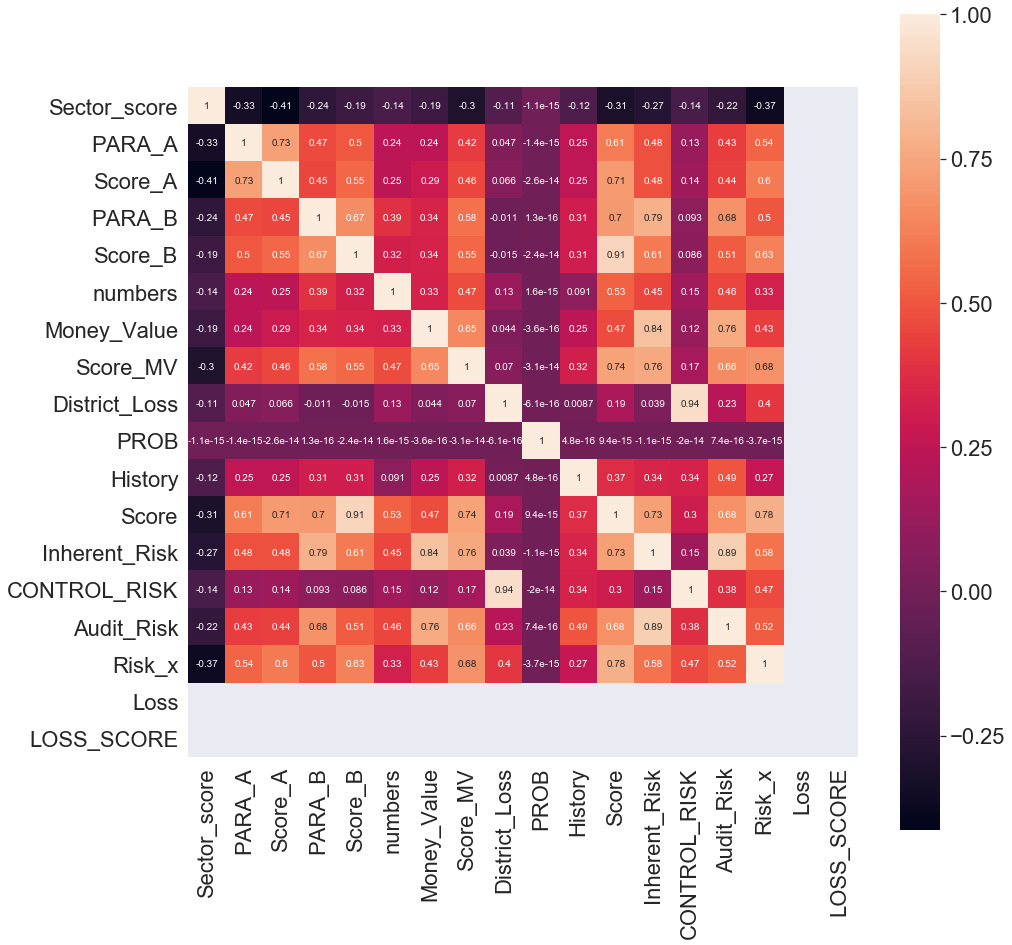

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (15,15))
sn.set(font_scale=2.0)
sn.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


# Now to create target and data for our classification tasks


In [27]:
y=df['Audit_Risk']
cols=list(df.columns)
cols.remove('Audit_Risk')
cols.remove('Risk_x')
X=df[cols]


## I shall now look at the data once more before starting to create models


In [28]:
print(X.info())
print(X.nunique())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 762
Data columns (total 16 columns):
Sector_score     713 non-null float64
PARA_A           713 non-null float64
Score_A          713 non-null float64
PARA_B           713 non-null float64
Score_B          713 non-null float64
numbers          713 non-null float64
Money_Value      713 non-null float64
Score_MV         713 non-null float64
District_Loss    713 non-null int64
PROB             713 non-null float64
History          713 non-null int64
Score            713 non-null float64
Inherent_Risk    713 non-null float64
CONTROL_RISK     713 non-null float64
Loss             713 non-null int64
LOSS_SCORE       713 non-null int64
dtypes: float64(12), int64(4)
memory usage: 94.7 KB
None
Sector_score      12
PARA_A           334
Score_A            3
PARA_B           325
Score_B            3
numbers            3
Money_Value      293
Score_MV           3
District_Loss      3
PROB               1
History            2
Score  


# Now to remove Prob, Loss and Loss score because they have only one value as well


In [29]:
df.drop('LOSS_SCORE', inplace=True, axis = 1)
df.drop('PROB', inplace=True, axis = 1)
df.drop('Loss', inplace=True, axis = 1)
X.drop('LOSS_SCORE', inplace=True, axis = 1)
X.drop('PROB', inplace=True, axis = 1)
X.drop('Loss', inplace=True, axis = 1)


In [30]:
print(df.shape,df.columns)
print(X.shape,X.columns)

(713, 15) Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk_x'],
      dtype='object')
(713, 13) Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'History', 'Score',
       'Inherent_Risk', 'CONTROL_RISK'],
      dtype='object')



# Now I am prepared to start making models for classification.
## Let's draw a few plots of the data before proceeding


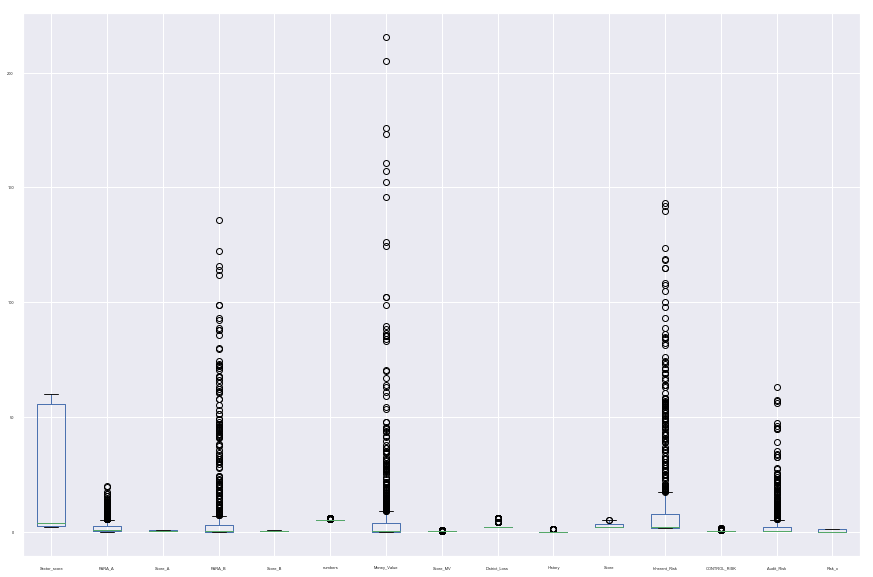

In [31]:
import matplotlib.pyplot as plt
ax = df.plot(kind='box',figsize=(15,10),legend=True, fontsize=4)
plt.show()

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


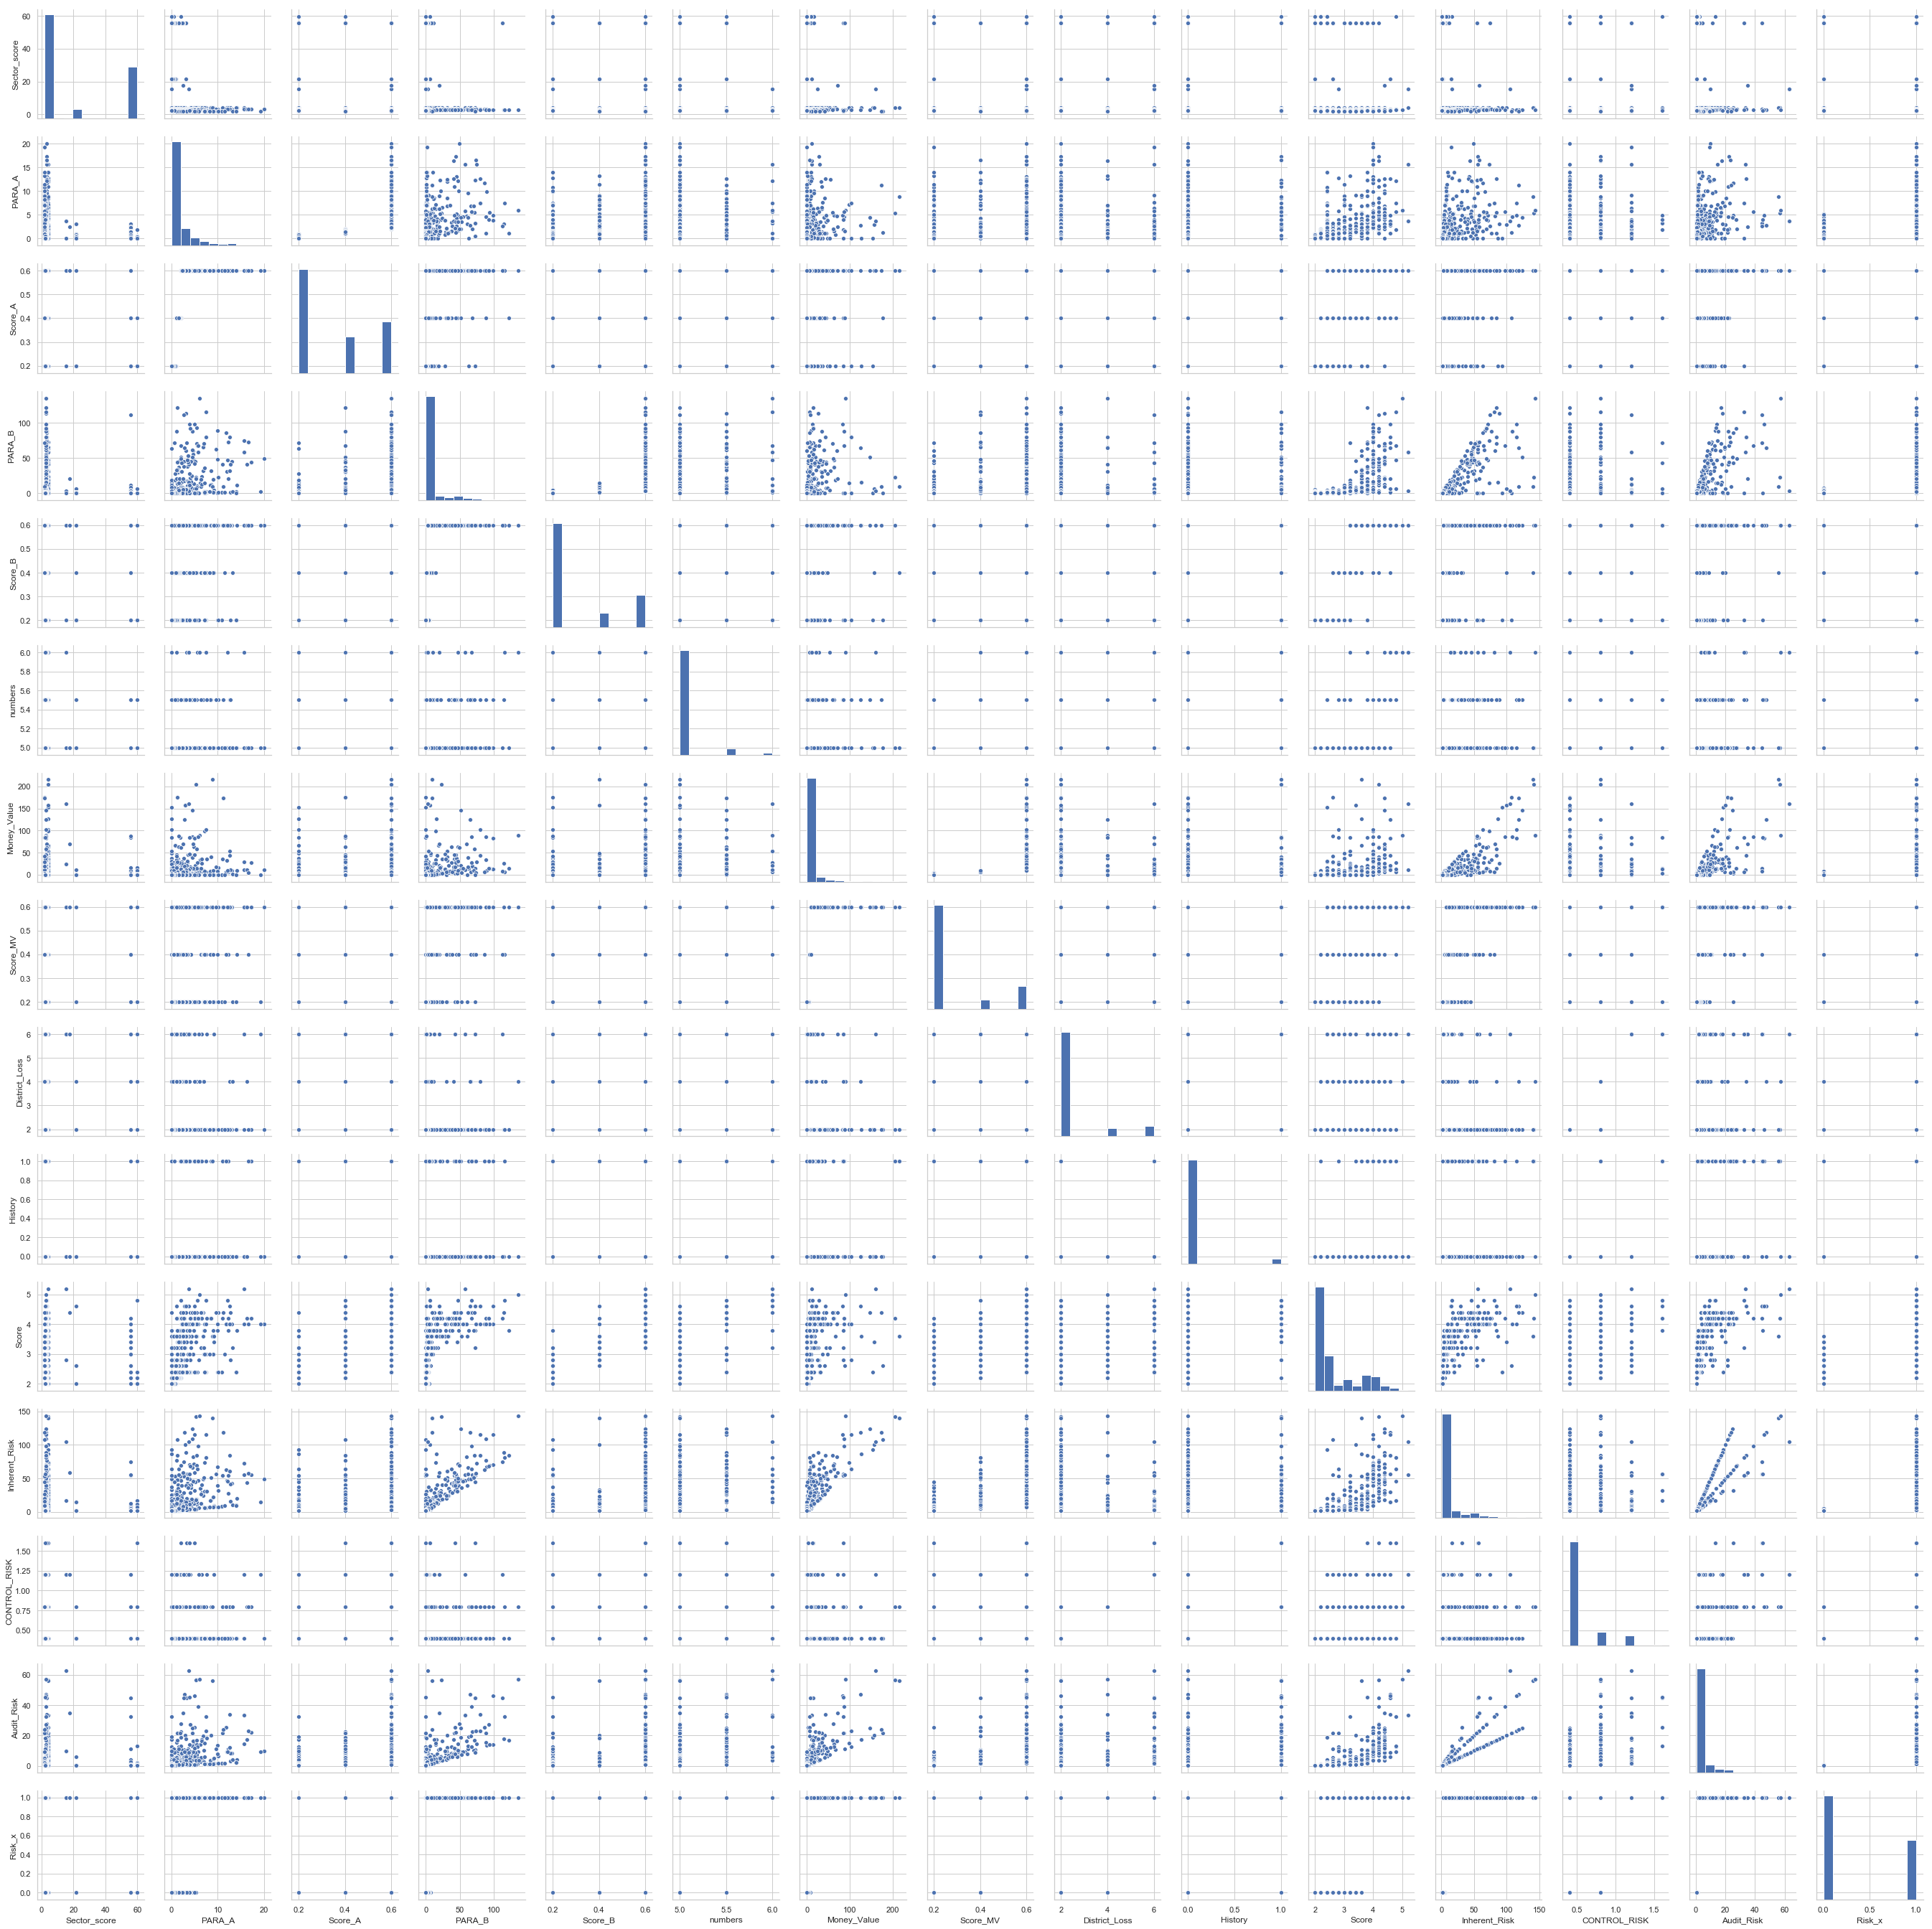

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df, size = 2.5)
plt.show()
#please click on the image to view in detail


# I shall use standard scaler because I have removed a lot ofoutliers and the data would be skewed very badly if I use MinMax Scaler


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=0)
kfold3 = KFold(n_splits=3, random_state=0)
kfold1 = KFold(n_splits=10, random_state=0)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]



# Q5 Creating Deeplearning models



# Now I will create a Perceptron


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(20, input_dim = 13, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1))

#step 2: make computational graph - compile
model1.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 150, batch_size = 300);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
534/534 [==============================] - 0s 321us/sample - loss: 60.7399 - mean_squared_error: 60.7399
Epoch 2/150
534/534 [==============================] - 0s 7us/sample - loss: 59.8180 - mean_squared_error: 59.8180
Epoch 3/150
534/534 [==============================] - 0s 9us/sample - loss: 58.9361 - mean_squared_error: 58.9361
Epoch 4/150
534/534 [==============================] - 0s 6us/sample - loss: 57.9939 - mean_squared_error: 57.9939
Epoch 5/150
534/534 [==============================] - 0s 13us/sample - loss: 57.1111 - mean_squared_error: 57.1111
Epoch 6/150
534/534 [==============================] - 0s 11us/sample - loss: 56.2259 - mean_squared_error: 56.2259
Epoch 7/150
534/534 [==============================] - 0s 7us/sample - loss: 55.3346 - mean_squared_error: 55.3346
Epoch 8/150
534/534 [==

Epoch 64/150
534/534 [==============================] - 0s 7us/sample - loss: 20.3816 - mean_squared_error: 20.3816
Epoch 65/150
534/534 [==============================] - 0s 7us/sample - loss: 19.9551 - mean_squared_error: 19.9551
Epoch 66/150
534/534 [==============================] - 0s 9us/sample - loss: 19.6258 - mean_squared_error: 19.6258
Epoch 67/150
534/534 [==============================] - 0s 7us/sample - loss: 19.2746 - mean_squared_error: 19.2746
Epoch 68/150
534/534 [==============================] - 0s 7us/sample - loss: 18.9589 - mean_squared_error: 18.9589
Epoch 69/150
534/534 [==============================] - 0s 9us/sample - loss: 18.5568 - mean_squared_error: 18.5568
Epoch 70/150
534/534 [==============================] - 0s 7us/sample - loss: 18.2512 - mean_squared_error: 18.2513
Epoch 71/150
534/534 [==============================] - 0s 7us/sample - loss: 17.8981 - mean_squared_error: 17.8981
Epoch 72/150
534/534 [==============================] - 0s 7us/sample - 

534/534 [==============================] - 0s 7us/sample - loss: 8.7113 - mean_squared_error: 8.7113
Epoch 135/150
534/534 [==============================] - 0s 7us/sample - loss: 8.6450 - mean_squared_error: 8.6450
Epoch 136/150
534/534 [==============================] - 0s 9us/sample - loss: 8.5584 - mean_squared_error: 8.5584
Epoch 137/150
534/534 [==============================] - 0s 7us/sample - loss: 8.4956 - mean_squared_error: 8.4956
Epoch 138/150
534/534 [==============================] - 0s 7us/sample - loss: 8.4167 - mean_squared_error: 8.4167
Epoch 139/150
534/534 [==============================] - 0s 7us/sample - loss: 8.3437 - mean_squared_error: 8.3437
Epoch 140/150
534/534 [==============================] - 0s 7us/sample - loss: 8.2682 - mean_squared_error: 8.2682
Epoch 141/150
534/534 [==============================] - 0s 7us/sample - loss: 8.2052 - mean_squared_error: 8.2052
Epoch 142/150
534/534 [==============================] - 0s 7us/sample - loss: 8.1284 - mean_s


## Accuracies of the perceptron


In [36]:
model1.evaluate(X_train, y_train)

534/534 [==============================] - 0s 177us/sample - loss: 7.5430 - mean_squared_error: 7.5430


[7.543047329906221, 7.5430474]

In [37]:
model1.evaluate(X_test, y_test)

179/179 [==============================] - 0s 33us/sample - loss: 12.1913 - mean_squared_error: 12.1913


[12.191278047401811, 12.191278]


## Calculating r2-score for perceptron


In [38]:
train_pred=model1.predict(X_train)
pred=model1.predict(X_test)

train 0.8644479998134291
test 0.8392487654879812


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


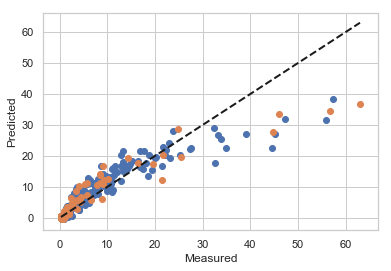

In [39]:
from sklearn.metrics import r2_score

print("train",r2_score(y_train, train_pred))
print("test",r2_score(y_test,pred))

fig,ax = plt.subplots()
ax.scatter(y_train, train_pred)
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I will create a Perceptron


In [40]:
import tensorflow as tf
from tensorflow import keras as ker
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Now I will create a Multi level perceptron


In [41]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 13, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1))

#step 2: make computational graph - compile
model1.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 100, batch_size = 250);

Epoch 1/100
534/534 [==============================] - 0s 527us/sample - loss: 59.2652 - mean_squared_error: 59.2652
Epoch 2/100
534/534 [==============================] - 0s 17us/sample - loss: 57.5109 - mean_squared_error: 57.5109
Epoch 3/100
534/534 [==============================] - 0s 15us/sample - loss: 55.7862 - mean_squared_error: 55.7862
Epoch 4/100
534/534 [==============================] - 0s 17us/sample - loss: 53.7623 - mean_squared_error: 53.7623
Epoch 5/100
534/534 [==============================] - 0s 15us/sample - loss: 51.7852 - mean_squared_error: 51.7852
Epoch 6/100
534/534 [==============================] - 0s 13us/sample - loss: 49.5071 - mean_squared_error: 49.5071
Epoch 7/100
534/534 [==============================] - 0s 15us/sample - loss: 47.2461 - mean_squared_error: 47.2461
Epoch 8/100
534/534 [==============================] - 0s 15us/sample - loss: 44.7102 - mean_squared_error: 44.7102
Epoch 9/100
534/534 [==============================] - 0s 19us/sample -


## Accuracies of the MLP


In [42]:
model1.evaluate(X_train, y_train)

534/534 [==============================] - 0s 282us/sample - loss: 1.5175 - mean_squared_error: 1.5175


[1.5174794459387604, 1.5174793]

In [43]:
model1.evaluate(X_test, y_test)

179/179 [==============================] - 0s 28us/sample - loss: 2.5490 - mean_squared_error: 2.5490


[2.549002293101902, 2.5490024]


## Calculating r2-score for MLP


In [44]:
train_pred=model1.predict(X_train)
pred=model1.predict(X_test)

train 0.9727302024795523
test 0.9663894726149531


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


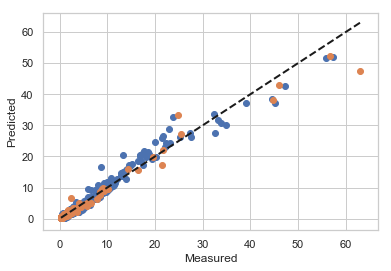

In [45]:
from sklearn.metrics import r2_score

print("train",r2_score(y_train, train_pred))
print("test",r2_score(y_test,pred))

fig,ax = plt.subplots()
ax.scatter(y_train, train_pred)
ax.scatter(y_test, pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# 4.Creating the models and recording results without PCA.



# Now I shall create a linear regression model


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

result=pd.DataFrame(columns=['Best_Parameters','Model','Test_score','Train_score'])

lreg = LinearRegression()
lreg.fit(X_train, y_train)
train=cross_val_score(lreg, X_train, y_train, cv=kfold).mean()
test=lreg.score(X_test,y_test)
print('Train score: ',train)
print('Test score: ',test)

Train score:  0.8638651724580999
Test score:  0.8747811858107485



## I shall add these to result


In [47]:
result.loc[len(result)]=[[ ],'Linear Regression',test,train] 


## I shall now create a measured~predict graph for linear regression


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


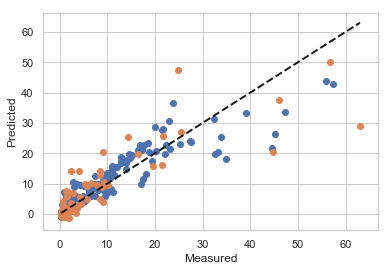

In [48]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(lreg,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(lreg,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now creating lasso 


In [49]:
from sklearn.linear_model import Lasso
param_grid={'alpha':[0.0001,0.001,0.01, 0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

gs_test=grid_search.score(X_test,y_test)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

In [50]:
print("Train:",grid_search.best_score_)
print("Test",gs_test)
print("parameters",grid_search.best_params_)

Train: 0.8645192127831154
Test 0.8739143343178251
parameters {'alpha': 0.01}



## I shall add these to result


In [51]:
result.loc[len(result)]=[grid_search.best_params_,'Lasso',gs_test,grid_search.best_score_] 


## I shall now create a measured~predict graph for lasso


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklea

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


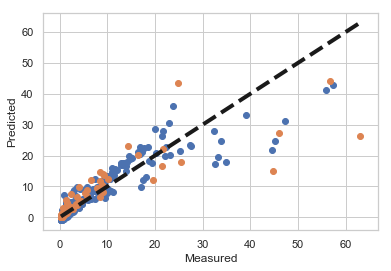

In [52]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a KNN Regressor


In [53]:
from sklearn.neighbors import KNeighborsRegressor
param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

k_ts=grid_search.score(X_test,y_test)

In [54]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.7783717754853128
Test 0.8130413480672021
parameters {'n_neighbors': 3}



## Clearly, k=3 gives the best model. I shall now create a measured~predict graph for KNN regressor


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

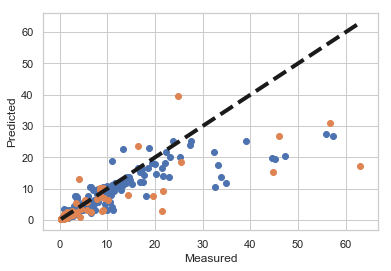

In [55]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## KNN model is added to result

In [56]:
result.loc[len(result)]=[grid_search.best_params_,'KNN',k_ts,grid_search.best_score_]


# Now I shall create a ridge model


In [57]:
from  sklearn.linear_model import Ridge

param_grid={'alpha':[0.001,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)
test_ridge=grid_search.score(X_test,y_test)

In [58]:
print("Train:",grid_search.best_score_)
print("Test",test_ridge)
print("parameters",grid_search.best_params_)

Train: 0.8647946962612401
Test 0.8744321487585839
parameters {'alpha': 1}



## I shall add these to result


In [59]:
result.loc[len(result)]=[grid_search.best_params_,'Ridge',test_ridge,grid_search.best_score_]


## Let's now plot the coefficients against alpha for Ridge.


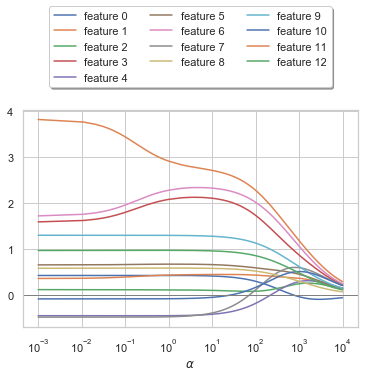

In [60]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()


## I shall now create a measured~predict graph for Ridge


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

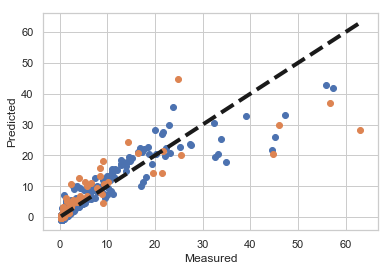

In [61]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a polynomial model


In [62]:
from  sklearn.preprocessing  import PolynomialFeatures
train_s_list = []
test_s_list = []
for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    train_s_list.append(cross_val_score(lreg, X_train_poly, y_train,cv=kfold).mean())
    lreg.fit(X_train_poly, y_train)
    model=lreg
    test_s_list.append(lreg.score(X_test_poly, y_test))

In [63]:
print(train_s_list)
print(test_s_list)

[0.8638651724580999, 0.9999860700168203, 0.985474349080923, 0.9177028432950175]
[0.8747811858107487, 1.0, 0.9870092353551204, 0.4121815895219634]



## Clearly polynomial of degree 2 gives best model


In [64]:
print("Train",train_s_list[1])
print("Test",test_s_list[1])
print("Best Parameters n=",2)

Train 0.9999860700168203
Test 1.0
Best Parameters n= 2



## I shall add these to result


In [65]:
result.loc[len(result)]=['{degree:2}','Polynomial',test_s_list[1],train_s_list[1]]


## I shall now create a measured~predict graph for polynomial regression


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

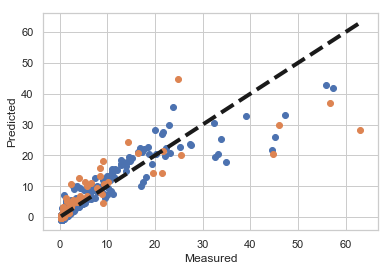

In [66]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a Linear SVR model


In [67]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter':[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_s

In [68]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.79907
Test set score with best parameters: 0.77216
best parameters are: {'C': 0.5, 'max_iter': 50000}



## I shall add these to result


In [69]:
result.loc[len(result)]=[grid_search.best_params_,'LinearSVR',test,grid_search.best_score_]


## I shall now create a measured~predict graph for linear SVR


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


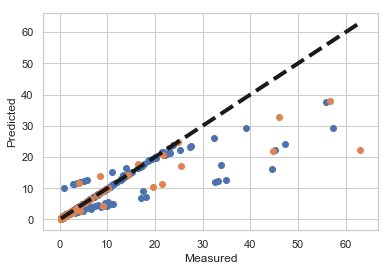

In [70]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with linear kernel trick


In [71]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 250, 10, 100,500]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)

In [72]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.79942
Test set score with best parameters: 0.77670
best parameters are: {'C': 500}



## I shall add these to result


In [73]:
result.loc[len(result)]=[grid_search.best_params_,'SVR-linear',test,train]


## I shall now create a measured~predict graph for SVR linear kernel trick


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


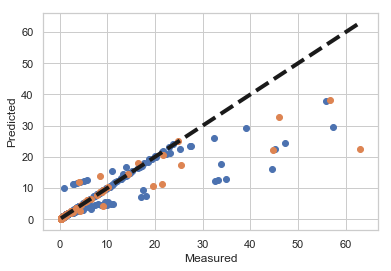

In [74]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with polynomial kernel trick


In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)
train=grid_search.best_score_

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.96646
Test set score with best parameters: 0.99051
best parameters are: {'C': 10, 'degree': 2}



## I shall add these to result


In [77]:
result.loc[len(result)]=[grid_search.best_params_,'SVR-polynomial',test,train]


## I shall now create a measured~predict graph for SVR polynomial


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


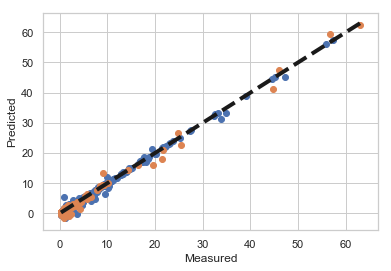

In [78]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with rbf kernel trick


In [79]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01, 10, 0.1, 1, 10, 100,500,1000],'gamma':[0.001,0.01, 10, 0.1, 1, 250, 100]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)
train=grid_search.best_score_

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [80]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.98650
Test set score with best parameters: 0.98878
best parameters are: {'C': 1000, 'gamma': 0.01}



## I shall add these to result


In [81]:
result.loc[len(result)]=[grid_search.best_params_,'SVR-rbf',test,train]


## I shall now create a measured~predict graph for SVR rbf


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


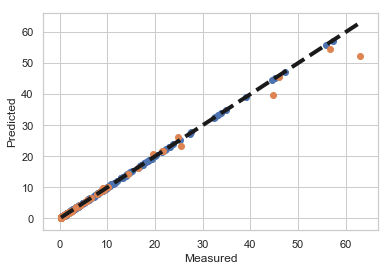

In [82]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now creating SGD Regressor( we decided to let alpha just be at 0.0001)


In [83]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 50000, penalty = 'l1')
sgd_reg2 = SGDRegressor(random_state= 0, max_iter = 50000, penalty = 'l2')
sgd_reg.fit(X_train, y_train)
sgd_reg2.fit(X_train, y_train)
tr1=cross_val_score(sgd_reg,X_train, y_train,cv=5).mean()
te1=cross_val_score(sgd_reg,X_test, y_test,cv=5).mean()
tr2=cross_val_score(sgd_reg2,X_train, y_train,cv=5).mean()
te2=cross_val_score(sgd_reg2,X_test, y_test,cv=5).mean()

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001,0.01, 10, 0.1, 1, 250, 100,500],'penalty':['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)
train=grid_search.best_score_


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.86287
Test set score with best parameters: 0.85976
best parameters are: {'alpha': 0.001, 'penalty': 'l1'}



## I shall add these to result


In [85]:
result.loc[len(result)]=[grid_search.best_params_,'SGD',test,train]


## I shall now create a measured~predict graph for sgd regression


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


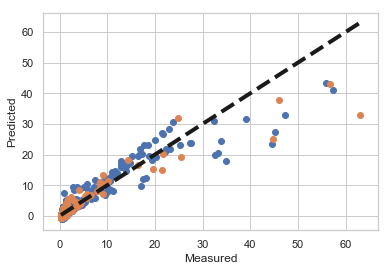

In [86]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [87]:
print(result)

                     Best_Parameters              Model  Test_score  \
0                                 []  Linear Regression    0.874781   
1                    {'alpha': 0.01}              Lasso    0.873914   
2                 {'n_neighbors': 3}                KNN    0.813041   
3                       {'alpha': 1}              Ridge    0.874432   
4                         {degree:2}         Polynomial    1.000000   
5      {'C': 0.5, 'max_iter': 50000}          LinearSVR    0.772160   
6                         {'C': 500}         SVR-linear    0.776696   
7             {'C': 10, 'degree': 2}     SVR-polynomial    0.990505   
8         {'C': 1000, 'gamma': 0.01}            SVR-rbf    0.988780   
9  {'alpha': 0.001, 'penalty': 'l1'}                SGD    0.859759   

   Train_score  
0     0.863865  
1     0.864519  
2     0.778372  
3     0.864795  
4     0.999986  
5     0.799069  
6     0.863865  
7     0.966464  
8     0.986503  
9     0.862869  



# 1. Now I shall create 2 models with bagging and pasting each.



## Bag1:Ridge


In [88]:
from sklearn.ensemble import BaggingRegressor
param_grid={'n_estimators':[100,200,500],'max_samples':[100,50,200]}

In [89]:
grid_search = GridSearchCV(BaggingRegressor(Ridge(alpha=1), bootstrap=True,oob_score=True,random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)

In [90]:
print("train",btr_score)
print("test",bte_score)
print("params",grid_search.best_params_)

train 0.8838544889786607
test 0.8693142082221517
params {'max_samples': 200, 'n_estimators': 500}


In [91]:
bg=BaggingRegressor(Ridge(alpha=1), bootstrap=True,oob_score=True,random_state=0,max_samples=200,n_estimators=500)
bg.fit(X_train,y_train)
btr_score = bg.score(X_train,y_train)
bte_score = bg.score(X_test,y_test)
predicted=bg.predict(X_test)
pred=bg.predict(X_train)

train 0.8838544889786607
test 0.8693142082221517
out_of_bag 0.8640499378556405


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


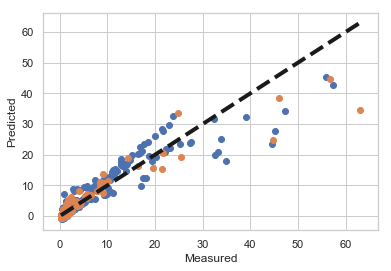

In [92]:
print("train",btr_score)
print("test",bte_score)
print("out_of_bag",bg.oob_score_)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## Bag2:LinearSVR


In [93]:
grid_search = GridSearchCV(BaggingRegressor(LinearSVR(C=0.5), bootstrap=True,oob_score=True,random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

In [94]:
print("train",btr_score)
print("test",bte_score)
print("params",grid_search.best_params_)

train 0.8038725414847058
test 0.7721593502699047
params {'max_samples': 100, 'n_estimators': 100}


In [95]:
bg=BaggingRegressor(LinearSVR(C=0.5), bootstrap=True,oob_score=True,random_state=0,max_samples=100,n_estimators=100)
bg.fit(X_train,y_train)
btr_score = bg.score(X_train,y_train)
bte_score = bg.score(X_test,y_test)
predicted=bg.predict(X_test)
pred=bg.predict(X_train)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


train 0.8038725414847057
test 0.7721593502699048
out_of_bag 0.8038726235230234


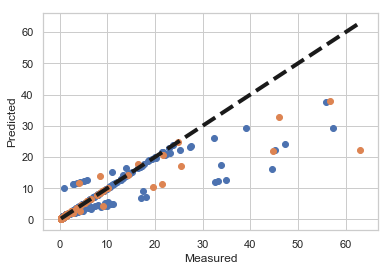

In [96]:
print("train",btr_score)
print("test",bte_score)
print("out_of_bag",bg.oob_score_)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## Paste1:SGD


In [97]:
grid_search = GridSearchCV(BaggingRegressor(SGDRegressor(alpha= 0.001, penalty='l1'), bootstrap=False,random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)
predicted=grid_search.predict(X_test)
pred=grid_search.predict(X_train)

train 0.8593178908654266
test 0.8243613231503663


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


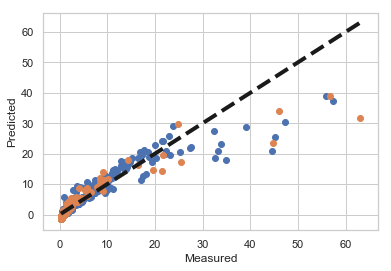

In [98]:
print("train",btr_score)
print("test",bte_score)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## Paste2:Lasso


In [99]:
grid_search = GridSearchCV(BaggingRegressor(Lasso(alpha=0.01), n_estimators=500, max_samples=100, bootstrap=False,random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)
predicted=grid_search.predict(X_test)
pred=grid_search.predict(X_train)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\linear_model\coordin

train 0.8805019537170554
test 0.8718700523692477


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


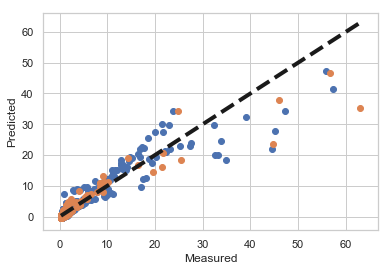

In [100]:
print("train",btr_score)
print("test",bte_score)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# 2.Now I will create 2 models with adaboosting



## adaboost KNN


In [101]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
param_grid={'n_estimators':[100,200,500],'learning_rate':[.1,.5,1]}
grid_search = GridSearchCV(AdaBoostRegressor(KNeighborsRegressor(n_neighbors=50),loss='square', random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)
predicted=grid_search.predict(X_test)
pred=grid_search.predict(X_train)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train 0.9219731732867478
test 0.8557695524956209


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


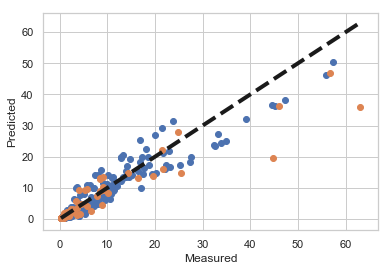

In [102]:
print("train",btr_score)
print("test",bte_score)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## adaboost SVR-rbf


In [103]:
ada_reg = AdaBoostRegressor(SVR(kernel='poly',C= 1000, gamma= 0.01), n_estimators=100,loss='square',learning_rate=0.25, random_state=0)
grid_search = GridSearchCV(AdaBoostRegressor(SVR(kernel='poly',C= 1000, gamma= 0.01),loss='square', random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)
predicted=grid_search.predict(X_test)
pred=grid_search.predict(X_train)

train 0.9990834049492994
test 0.9778152002601483


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


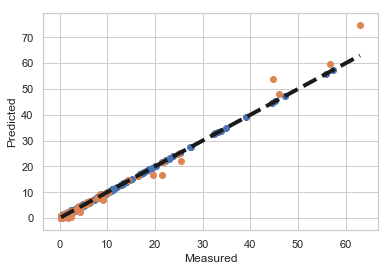

In [104]:
print("train",btr_score)
print("test",bte_score)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# 3.Now I will apply one model with gradient boosting


In [105]:
from  sklearn.ensemble import GradientBoostingRegressor
param_grid={'n_estimators':[100,200,500],'learning_rate':[.1,.5,1],'max_depth':[1,2,3,4,5]}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0),param_grid, cv=kfold, return_train_score=True,scoring='r2');
grid_search.fit(X_train,y_train)
btr_score = grid_search.score(X_train,y_train)
bte_score = grid_search.score(X_test,y_test)
predicted=grid_search.predict(X_test)
pred=grid_search.predict(X_train)

train 0.9998249198368316
test 0.98036368565528


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


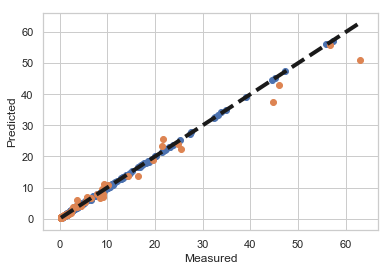

In [106]:
print("train",btr_score)
print("test",bte_score)
fig,ax = plt.subplots()
ax.scatter(y_train, pred)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# 4. Now I shall get back to question 4 by performing PCA and rerunning all the models from project 1


In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(X_train)
pca.n_components_

10

In [108]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
result_reg=pd.DataFrame(columns=['Best_Parameters','Model','Test_score','Train_score'])
y_reg=y


# Now I shall create a linear regression model


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lreg = LinearRegression()
lreg.fit(X_train, y_train)
train=cross_val_score(lreg, X_train, y_train, cv=kfold).mean()
test=lreg.score(X_test,y_test)
print('Train score: ',train)
print('Test score: ',test)

Train score:  0.8649667406205944
Test score:  0.8747021217666925



## I shall add these to result_reg


In [110]:
result_reg.loc[len(result_reg)]=[[ ],'Linear Regression',test,train] 


## I shall now create a measured~predict graph for linear regression


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


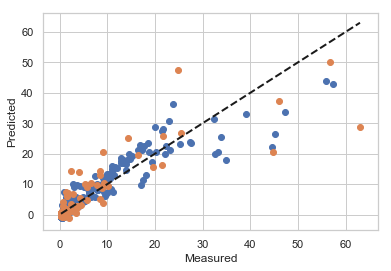

In [111]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(lreg,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(lreg,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now creating lasso 


In [112]:
from sklearn.linear_model import Lasso
param_grid={'alpha':[0.0001,0.001,0.01, 0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

gs_test=grid_search.score(X_test,y_test)

In [113]:
print("Train:",grid_search.best_score_)
print("Test",gs_test)
print("parameters",grid_search.best_params_)

Train: 0.8649285136509055
Test 0.8746907574845841
parameters {'alpha': 0.0001}



## I shall add these to result_reg


In [114]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'Lasso',gs_test,grid_search.best_score_] 


## I shall now create a measured~predict graph for lasso


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

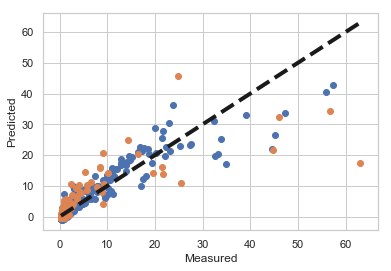

In [115]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## I shall however, refrain from using it as they do create much impact on the scores of the other models



# Now I shall create a KNN Regressor


In [116]:
from sklearn.neighbors import KNeighborsRegressor
param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

k_ts=grid_search.score(X_test,y_test)

In [117]:
print("Train:",grid_search.best_score_)
print("Test",k_ts)
print("parameters",grid_search.best_params_)

Train: 0.7783712054503468
Test 0.8130412478596024
parameters {'n_neighbors': 3}



## Clearly, k=3 gives the best model. I shall now create a measured~predict graph for KNN regressor


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

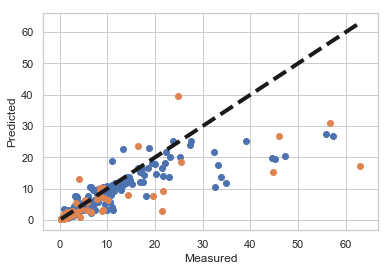

In [118]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


## KNN model is added to result_reg

In [119]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'KNN',k_ts,grid_search.best_score_]


# Now I shall create a ridge model


In [120]:
from  sklearn.linear_model import Ridge

param_grid={'alpha':[0.001,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)
test_ridge=grid_search.score(X_test,y_test)

In [121]:
print("Train:",grid_search.best_score_)
print("Test",test_ridge)
print("parameters",grid_search.best_params_)

Train: 0.8649321303878985
Test 0.8747018385123799
parameters {'alpha': 0.001}



## I shall add these to result_reg


In [122]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'Ridge',test_ridge,grid_search.best_score_]


## I shall now create a measured~predict graph for Ridge


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

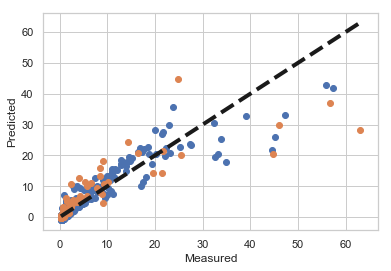

In [123]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a polynomial model


In [124]:
from  sklearn.preprocessing  import PolynomialFeatures
train_s_list = []
test_s_list = []
for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    train_s_list.append(cross_val_score(lreg, X_train_poly, y_train,cv=kfold).mean())
    lreg.fit(X_train_poly, y_train)
    model=lreg
    test_s_list.append(lreg.score(X_test_poly, y_test))

In [125]:
print(train_s_list)
print(test_s_list)

[0.8649667406205943, 0.9995917179338722, -8478.410132792455, -514.3562117192096]
[0.8747021217666924, 0.9999587506857404, -23533.520686815173, -418.762324512364]



## Clearly polynomial of degree 2 gives best model


In [126]:
print("Train",train_s_list[1])
print("Test",test_s_list[1])
print("Best Parameters n=",2)

Train 0.9995917179338722
Test 0.9999587506857404
Best Parameters n= 2



## I shall add these to result_reg


In [127]:
result_reg.loc[len(result_reg)]=["{degree:2}",'Polynomial',test_s_list[1],train_s_list[1]]


## I shall now create a measured~predict graph for polynomial regression


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

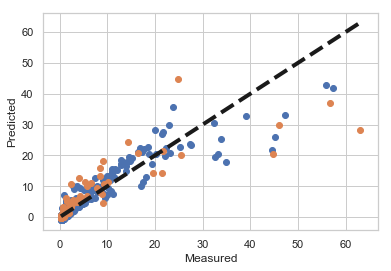

In [128]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = cross_val_predict(grid_search,X_train,y_train, cv=kfold)
ax.scatter(y_train, predicted)
predicted = cross_val_predict(grid_search,X_test,y_test, cv=kfold)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a Linear SVR model


In [129]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 0.5, 10, 100], 'max_iter':[50000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:931: C

In [130]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.79922
Test set score with best parameters: 0.77230
best parameters are: {'C': 0.5, 'max_iter': 50000}



## I shall add these to result_reg


In [131]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'LinearSVR',test,grid_search.best_score_]


## I shall now create a measured~predict graph for linear SVR


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


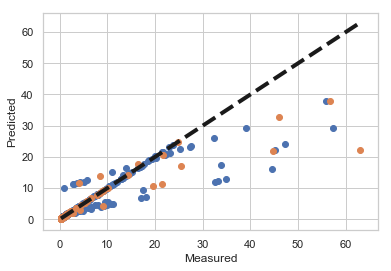

In [132]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with linear kernel trick


In [133]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 250, 10, 100], 'max_iter':[60000]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=kfold, return_train_score=True)

grid_search.fit(X_train, y_train)

test=grid_search.score(X_train,y_train)
train=grid_search.best_score_



C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=60000).  Consider pre-processing your data with StandardScaler 

In [134]:
print("Train set score with best parameters: {:.5f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.80563
Test set score with best parameters: 0.80965
best parameters are: {'C': 250, 'max_iter': 60000}



## I shall add these to result_reg


In [135]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SVR-linear',test,train]


## I shall now create a measured~predict graph for SVR linear kernel trick


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


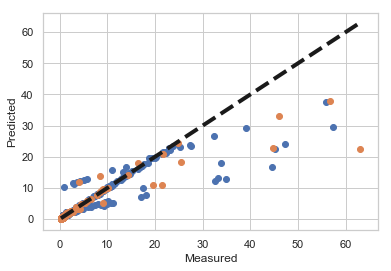

In [136]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with polynomial kernel trick


In [137]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 250, 100, 500],'degree':[1,2,3,4]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,scoring='r2',cv=kfold).mean();
train=cross_val_score(grid_search,X_train, y_train,scoring='r2',cv=kfold).mean();

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anant\Anaconda3\

In [138]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.94501
Test set score with best parameters: 0.86188
best parameters are: {'C': 1, 'degree': 3}



## I shall add these to result_reg


In [139]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SVR-polynomial',test,train]


## I shall now create a measured~predict graph for SVR polynomial


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


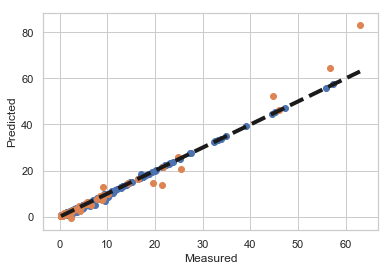

In [140]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now I shall create a SVR with rbf kernel trick


In [141]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01, 10, 0.1, 1, 10, 100,500,1000],'gamma':[0.001,0.01, 10, 0.1, 1, 250, 100]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)
train=grid_search.best_score_

C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [142]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.98635
Test set score with best parameters: 0.98889
best parameters are: {'C': 1000, 'gamma': 0.01}



## I shall add these to result


In [143]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SVR-rbf',test,train]


## I shall now create a measured~predict graph for SVR rbf


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


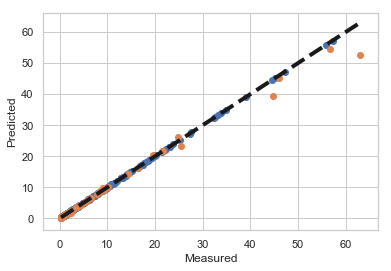

In [144]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


# Now creating SGD Regressor( we decided to let alpha just be at 0.0001)


In [145]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 50000, penalty = 'l1')
sgd_reg2 = SGDRegressor(random_state= 0, max_iter = 50000, penalty = 'l2')
sgd_reg.fit(X_train, y_train)
sgd_reg2.fit(X_train, y_train)
tr1=cross_val_score(sgd_reg,X_train, y_train,cv=5).mean()
te1=cross_val_score(sgd_reg,X_test, y_test,cv=5).mean()
tr2=cross_val_score(sgd_reg2,X_train, y_train,cv=5).mean()
te2=cross_val_score(sgd_reg2,X_test, y_test,cv=5).mean()

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001,0.01, 10, 0.1, 1, 250, 100,500],'penalty':['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=grid_search.score(X_test,y_test)
train=grid_search.best_score_


In [146]:
print("Train set score with best parameters: {:.5f}".format(train))
print("Test set score with best parameters: {:.5f}".format(test))
print("best parameters are:",grid_search.best_params_)

Train set score with best parameters: 0.86265
Test set score with best parameters: 0.86858
best parameters are: {'alpha': 0.01, 'penalty': 'l1'}



## I shall add these to result


In [147]:
result_reg.loc[len(result_reg)]=[grid_search.best_params_,'SGD',test,train]


## I shall now create a measured~predict graph for sgd regression


C:\Users\anant\Anaconda3\envs\tensorflow_newenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


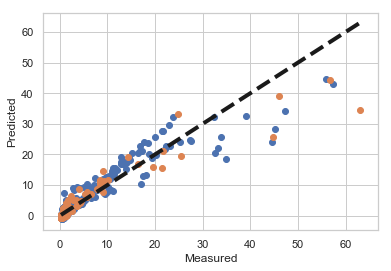

In [148]:
from sklearn.model_selection import cross_val_predict
fig,ax = plt.subplots()
predicted = grid_search.predict(X_train)
ax.scatter(y_train, predicted)
predicted = grid_search.predict(X_test)
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [149]:
result

Best_Parameters              Model  Test_score  \
0                                 []  Linear Regression    0.874781   
1                    {'alpha': 0.01}              Lasso    0.873914   
2                 {'n_neighbors': 3}                KNN    0.813041   
3                       {'alpha': 1}              Ridge    0.874432   
4                         {degree:2}         Polynomial    1.000000   
5      {'C': 0.5, 'max_iter': 50000}          LinearSVR    0.772160   
6                         {'C': 500}         SVR-linear    0.776696   
7             {'C': 10, 'degree': 2}     SVR-polynomial    0.990505   
8         {'C': 1000, 'gamma': 0.01}            SVR-rbf    0.988780   
9  {'alpha': 0.001, 'penalty': 'l1'}                SGD    0.859759   

   Train_score  
0     0.863865  
1     0.864519  
2     0.778372  
3     0.864795  
4     0.999986  
5     0.799069  
6     0.863865  
7     0.966464  
8     0.986503  
9     0.862869

In [150]:
result_reg

Best_Parameters              Model  Test_score  \
0                                []  Linear Regression    0.874702   
1                 {'alpha': 0.0001}              Lasso    0.874691   
2                {'n_neighbors': 3}                KNN    0.813041   
3                  {'alpha': 0.001}              Ridge    0.874702   
4                        {degree:2}         Polynomial    0.999959   
5     {'C': 0.5, 'max_iter': 50000}          LinearSVR    0.772301   
6     {'C': 250, 'max_iter': 60000}         SVR-linear    0.809655   
7             {'C': 1, 'degree': 3}     SVR-polynomial    0.861876   
8        {'C': 1000, 'gamma': 0.01}            SVR-rbf    0.988887   
9  {'alpha': 0.01, 'penalty': 'l1'}                SGD    0.868582   

   Train_score  
0     0.864967  
1     0.864929  
2     0.778371  
3     0.864932  
4     0.999592  
5     0.799220  
6     0.805632  
7     0.945008  
8     0.986347  
9     0.862653


# The PCA does have an influence improving some models, adversley affecting others and influencing hyperparameters of others. Polynomial however remains the best model.
